In [1]:
import torchvision.models as models
import torch.optim as optim
import time
import torch
import torch.nn as nn
from Train import trainmodel
time1 = time.time()
print(time1)
batch_size = [24]
device = 7
model_name_list = ["untran-densenet161"]
model1 = models.densenet161(pretrained=False)
model1

1591154122.9516695


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [2]:
model1.classifier=nn.Linear(2208,6)
model1

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

untran-densenet161
1768 328
Epoch: 1
Epoch: 001, Training: Loss: 1.4582, Accuracy: 43.6086%,Valid: Loss: 1.5049, Accuracy: 43.2927%,Time: 34.6567s
Epoch: 2
Epoch: 002, Training: Loss: 1.5242, Accuracy: 37.9525%,Valid: Loss: 1.4264, Accuracy: 39.6341%,Time: 32.9207s
Epoch: 3
Epoch: 003, Training: Loss: 1.3651, Accuracy: 45.5882%,Valid: Loss: 1.3478, Accuracy: 50.6098%,Time: 32.9108s
Epoch: 4
Epoch: 004, Training: Loss: 1.2846, Accuracy: 49.6606%,Valid: Loss: 1.2997, Accuracy: 53.0488%,Time: 33.3611s
Epoch: 5
Epoch: 005, Training: Loss: 1.2330, Accuracy: 49.6606%,Valid: Loss: 1.2683, Accuracy: 49.6951%,Time: 32.9209s
Epoch: 6
Epoch: 006, Training: Loss: 1.1871, Accuracy: 52.2059%,Valid: Loss: 1.3625, Accuracy: 45.7317%,Time: 32.9316s
Epoch: 7
Epoch: 007, Training: Loss: 1.1824, Accuracy: 52.6018%,Valid: Loss: 1.2887, Accuracy: 55.4878%,Time: 32.7257s
Epoch: 8
Epoch: 008, Training: Loss: 1.0840, Accuracy: 58.1448%,Valid: Loss: 1.1085, Accuracy: 59.4512%,Time: 31.8404s
Epoch: 9
Epoch: 009,

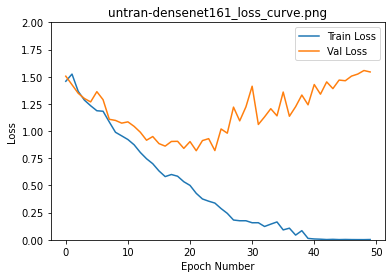

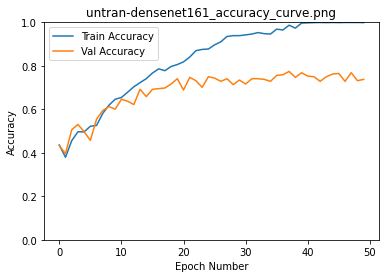

RuntimeError: CUDA error: out of memory

In [3]:
model_list = [model1]
lossfunc = torch.nn.CrossEntropyLoss().cuda(device)
for size in batch_size:
    i = 0
    for models in model_list:
        file_name = model_name_list[i]
        print(file_name)
        optimizer = optim.Adam(models.parameters())
        trainmodel(model_name=models,loss = lossfunc,batchsize=size,opti=optimizer,\
                   epoch_num=50,device_num=device,filename=file_name)
        i+=1